<a href="https://colab.research.google.com/github/samarthsoni17/ideal-ML-train/blob/workbench/Linear%20Regression/1_22_dummy_variables_with_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dummy variables or how to deal with categorical predictors

## Import the relevant libraries

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
# We can override the default matplotlib styles with those of Seaborn
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load the data

In [ ]:
# Load the data from a .csv in the same folder. 
# From Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Since we will do some preprocessing, the variable is not called 'data' just yet!
path = '/content/drive/MyDrive/Colab Notebooks/Datasets/365DSc/Linear Regression/1_22_dummy-variables-dataset/1.03. Dummies.csv'
raw_data = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Let's check what's inside this data frame
# Attendance: No means less than 75% attendance, Yes means > 75%
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


## Map the data

In [ ]:
# Map all 'No' entries with 0, and all 'Yes' entries with 1. Put that in a new variable called 'data'
# Note data is a copy of raw_data, because of how pointers in Python work
data = raw_data.copy()
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})
#we now have a dummy variable

# Let's see what's inside
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [ ]:
# This method gives us very nice descriptive statistics.
data.describe()
#mean of attendance = 0.46 < 0.5
# thus there are more 0s than 1s
#and 46.4% of the students attended more than 75% classes

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


## Regression

In [ ]:
# Following the regression equation, our dependent variable (y) is the GPA
y = data ['GPA']
# Similarly, our independent variable (x) is the SAT score
x1 = data [['SAT','Attendance']]

In [ ]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression.
results.summary()

#resulting equation is
#GPA = 0.6439 + 0.0014*SAT + 0.2226*Attendance
#where attendance can be 0 or 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           2.19e-15
Time:                        06:00:35   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plot the regression line(s) on the scatter plot

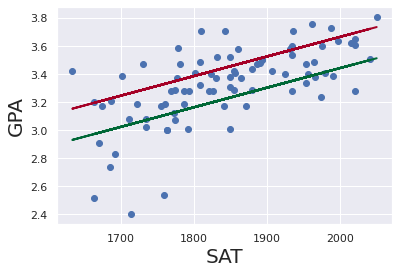

In [ ]:
# Create a scatter plot of SAT and GPA
plt.scatter(data['SAT'],y)
# Define the two regression equations, depending on whether they attended (yes), or didn't (no)
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
# Plot the two regression lines
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026')
# Name your axes :)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

#Observatoin;
#On avg, GPA of students who attended 75%+ is 0.2226 higher than those who didn't attend

## Plot the regression line(s) on the scatter plot and color the data points

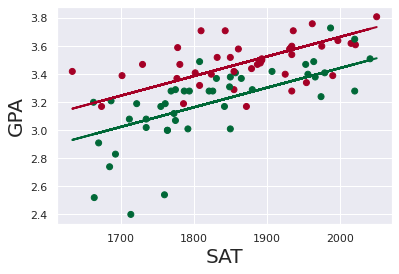

In [ ]:
# In this code I want to colour the points depending on attendance
# Note: This code would have been very easy in Seaborn

# Create one scatter plot which contains all observations
# Use the series 'Attendance' as color, and choose a colour map of our choice
# The colour map I've chosen i.e. RdYlGn_r is completely arbitrary
plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')
#Here, red = students with attendance >75%
#Green = attendance <75%

# Define the two regression equations (one with a dummy = 1, the other with dummy = 0)
# We have those above already, but for the sake of consistency, we will also include them here
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']

# Plot the two regression lines
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## Add the original regression line

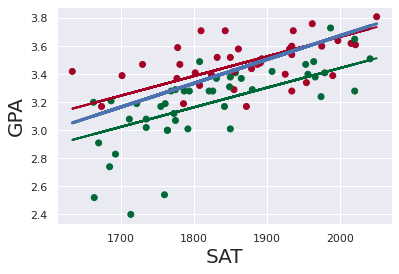

In [ ]:
# Same as above, this time we are including the regression line WITHOUT the dummies.

# In this code I want to color the points depending on attendance
# Note: This code would have been very easy in Seaborn

# Create one scatter plot which contains all observations
# Use the series 'Attendance' as color, and choose a colour map of your choice
# The colour map I've chosen i.e. RdYlGn_r is completely arbitrary
plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')

# Define the two regression equations (one with a dummy = 1, the other with dummy = 0)
# We have those above already, but for the sake of consistency, we will also include them here
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
# Original regression line
yhat = 0.0017*data['SAT'] + 0.275

# Plot the two regression lines
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837', label ='regression line1')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026', label ='regression line2')
# Plot the original regression line
fig = plt.plot(data['SAT'],yhat, lw=3, c='#4C72B0', label ='regression line')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## How to make predictions based on the regressions we create

In [ ]:
x #const = x0 i.e. whose coefficient is b0; thus here it contains only 1's

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [ ]:
new_data = pd.DataFrame({'const':1, 'SAT':[1700, 1670], 'Attendance':[0,1]})
#since data frames usually arrange columns in alphabetical order, I will overwrite new_data with the columns in the order specified by me
new_data = new_data[['const', 'SAT','Attendance']]

#I will further change the indices for the model but we do not need to do this IRL
# new_data.rename(index={0:'Person1',1:'Person2'})

#printing the DF we created
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [ ]:
predictions = results.predict(new_data) #results = fitted regression = sm.OLS(y,x).fit()
predictions

0    3.023513
1    3.204163
dtype: float64

In [ ]:
#we transform it into  dataframe and join it with the earlier one
predictions_df = pd.DataFrame( {'Predictions' : predictions})

joined = new_data.join(predictions_df)

joined.rename(index={0:'Person1',1:'Person2'})

# we can observe that due to the significant contribution of "Attendance" we have been able to predict that the GPA of P2 will be greater than that of P1 
# inspite of having a lower SAT score

,const,SAT,Attendance,Predictions
Person1,1,1700,0,3.023513
Person2,1,1670,1,3.204163


# Multiple Linear Regression with Dummies - Exercise Solution

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year_view.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size', 'year', and 'view'.

#### Regarding the 'view' variable:
There are two options: 'Sea view' and 'No sea view'. You are expected to create a dummy variable for view and include it in the regression

Good luck!

## Import the relevant libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Load the data

In [ ]:
# From Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

#Since we will do some preprocessing, the variable is not called 'data' just yet!
path = '/content/drive/MyDrive/Colab Notebooks/Datasets/365DSc/Linear Regression/1_22_dummy-variables-dataset/real_estate_price_size_year_view.csv'
raw_data = pd.read_csv(path)

In [ ]:
raw_data.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [ ]:
raw_data.describe(include='all')

,price,size,year,view
count,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,No sea view
freq,NaN,NaN,NaN,51
mean,292289.470160,853.024200,2012.600000,NaN
std,77051.727525,297.941951,4.729021,NaN
min,154282.128000,479.750000,2006.000000,NaN
25%,234280.148000,643.330000,2009.000000,NaN
50%,280590.716000,696.405000,2015.000000,NaN
75%,335723.696000,1029.322500,2018.000000,NaN


## Create a dummy variable for 'view'

In [ ]:
data = raw_data.copy()
data['view'] = data['view'].map({'Sea view': 1, 'No sea view': 0})

In [ ]:
data.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


## Create the regression

### Declare the dependent and the independent variables

In [ ]:
y = data['price']
x1 = data[['size','year','view']]

### Regression

In [ ]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           1.02e-50
Time:                        04:39:38   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plot the regression line(s) on the scatter plot and color the data points

In the 3-D plot, note that the apartments with Sea view are on an average, 56730 units higher in price as compared to apartments with no seaview!


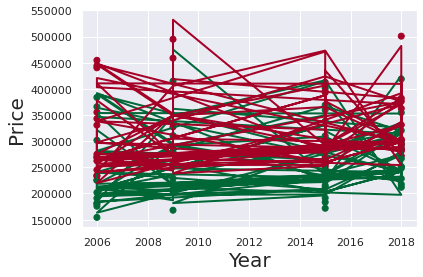

In [ ]:
# In this code I want to colour the points depending on Sea View
# Note: This code would have been very easy in Seaborn

# Create one scatter plot which contains all observations
# Use the series 'Sea View' as color, and choose a colour map of our choice
# The colour map I've chosen i.e. RdYlGn_r is completely arbitrary
plt.scatter(data['year'],data['price'], c=data['view'],cmap='RdYlGn_r') ##scatter plot between year and price
#Here, red = Sea View present
#Green = Sea View Absent

# Define the two regression equations (one with a dummy = 1, the other with dummy = 0)
# We have those above already, but for the sake of consistency, we will also include them here
yhat_no = (-5.398e+06) + 223.0316*data['size'] +	2718.9489*data['year'] + (5.673e+04)*0
yhat_yes =(-5.398e+06) + 223.0316*data['size'] +  2718.9489*data['year'] + (5.673e+04)*1

# Plot the two regression lines
fig = plt.plot(data['year'], yhat_no, lw=2, c='#006837')
fig = plt.plot(data['year'], yhat_yes, lw=2, c='#a50026')
# plt.xlabel('Size', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.show()

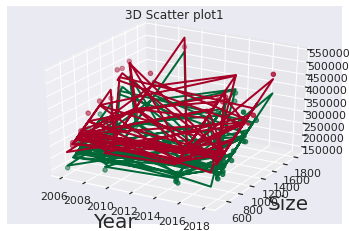

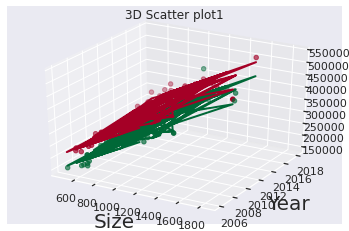

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure()

# *** FORWARD VIEW ON 'YEAR' ATTRIBUTE ***
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axes
x = data['year']
y = data['size']
z = data['price']
z_no = yhat_no
z_yes = yhat_yes

ax.scatter(x, y, z, c=data['view'],cmap='RdYlGn_r')

# plotting
ax.plot3D(x, y, z_no, lw=2, c='#006837') # a line through the points
ax.plot3D(x, y, z_yes, lw=2, c='#a50026')

ax.set_title('3D Scatter plot1')
plt.ylabel('Size', fontsize = 20)
# plt.xlabel('size', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.show()


# *** FORWARD VIEW ON 'SIZE' ATTRIBUTE ***
# syntax for 3-D projection
ax2 = plt.axes(projection ='3d')
 
# defining all 3 axes
y2 = data['year']
x2 = data['size']
z2 = data['price']
z2_no = yhat_no
z2_yes = yhat_yes

ax2.scatter(x2, y2, z2, c=data['view'],cmap='RdYlGn_r')

# plotting
ax2.plot3D(x2, y2, z2_no, lw=2, c='#006837') # a line through the points
ax2.plot3D(x2, y2, z2_yes, lw=2, c='#a50026')

ax2.set_title('3D Scatter plot1')
plt.ylabel('Year', fontsize = 20)
# plt.xlabel('size', fontsize = 20)
plt.xlabel('Size', fontsize = 20)
plt.show()